In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.special import spherical_jn as jl
from scipy.special import spherical_yn as nl

In [3]:
Vf=[0.5,1,10,100]

In [4]:
def dl(X,Xp,n):
    jlp=jl(n,X,derivative=True)
    jlpp=jl(n,Xp,derivative=True)
    jlx=jl(n,X)
    jlxp=jl(n,Xp)
    nlx=nl(n,X)
    nlp=nl(n,X,derivative=True)
    return arctan((X*jlp*jlxp-Xp*jlpp*jlx)/(X*nlp*jlxp-Xp*jlpp*nlx))

In [7]:
def sc(v):
    LL=100
    x=array(linspace(0.1,50,1000))
    xp=[]
    for i in range(len(v)):
        V=v[i]
        xp=sqrt(x**2+V)
        Tsc=[]
        for j in range(len(x)):
            xx=x[j]
            xxp=xp[j]
            Tsc.append(sum([(2*l+1)*sin(dl(xx,xxp,l))**2 for l in range(LL)])/xx**2)
        figure(i)
        figure(figsize=(9,5))
        plot(x,Tsc)
        xlabel(r'$kR$',fontsize=15)
        ylabel(r'total cross section scaled by $\frac{1}{4 \pi R^2}$',fontsize=15)
        title(r'total cross section ($\frac{2m R^2}{\hbar^2} V_0$=%s,truncate number $\scr{l}$=%s) '\
              %(V,LL),fontsize=15)
    show()

<Figure size 432x288 with 0 Axes>

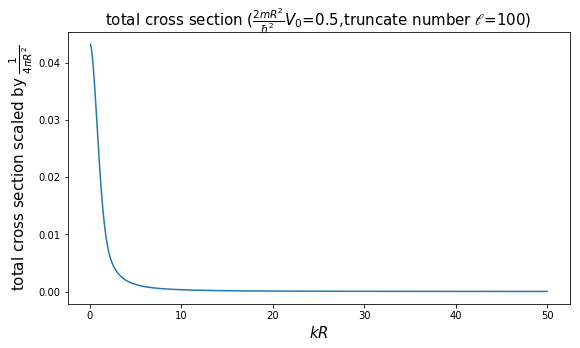

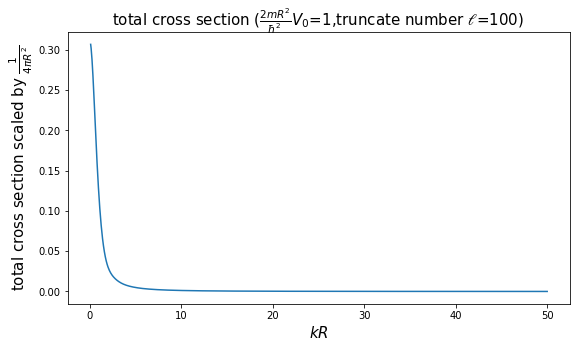

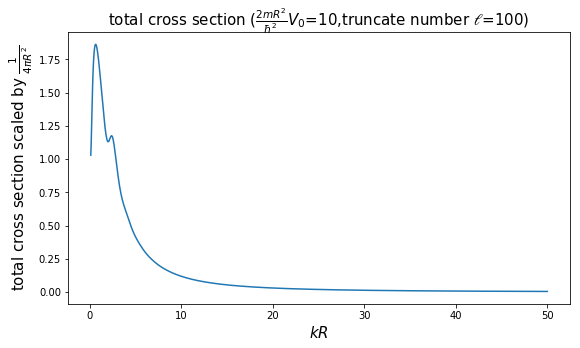

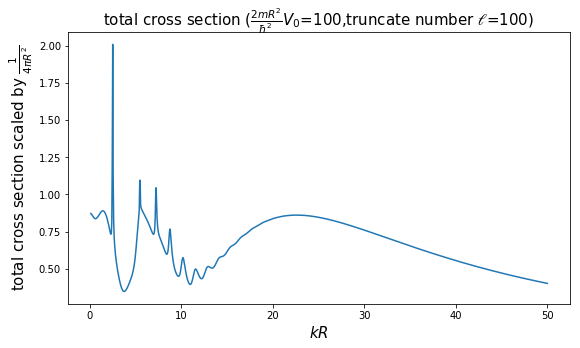

In [8]:
sc(Vf)